In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

### Checking the application dataset

In [3]:
inp0=pd.read_csv('application_data.csv')

In [4]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
inp0.shape

(307511, 122)

#### Dealing with missing values

In [6]:
inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#Creating function to check null values abou certain percentage
def nullvalper(df,percent=0.0):
    for i in df.columns:
        nullval=100.0*df[i].isnull().sum()/len(df)
        if nullval>percent:
            print(i,':',nullval)


In [8]:
##Get null values columns above 50%
nullvalper(inp0,50)

OWN_CAR_AGE : 65.9908100848425
EXT_SOURCE_1 : 56.38107254699832
APARTMENTS_AVG : 50.749729277977046
BASEMENTAREA_AVG : 58.515955526794166
YEARS_BUILD_AVG : 66.49778381911541
COMMONAREA_AVG : 69.87229725115525
ELEVATORS_AVG : 53.29597965601231
ENTRANCES_AVG : 50.34876801155081
FLOORSMIN_AVG : 67.84862980511267
LANDAREA_AVG : 59.376737742714894
LIVINGAPARTMENTS_AVG : 68.35495315614726
LIVINGAREA_AVG : 50.193326417591564
NONLIVINGAPARTMENTS_AVG : 69.43296337366793
NONLIVINGAREA_AVG : 55.17916432257708
APARTMENTS_MODE : 50.749729277977046
BASEMENTAREA_MODE : 58.515955526794166
YEARS_BUILD_MODE : 66.49778381911541
COMMONAREA_MODE : 69.87229725115525
ELEVATORS_MODE : 53.29597965601231
ENTRANCES_MODE : 50.34876801155081
FLOORSMIN_MODE : 67.84862980511267
LANDAREA_MODE : 59.376737742714894
LIVINGAPARTMENTS_MODE : 68.35495315614726
LIVINGAREA_MODE : 50.193326417591564
NONLIVINGAPARTMENTS_MODE : 69.43296337366793
NONLIVINGAREA_MODE : 55.17916432257708
APARTMENTS_MEDI : 50.749729277977046
BASEMEN

In [9]:
#Delete columns with null values greater than 50%
inp0 = inp0[inp0.columns[inp0.isnull().sum()< (len(inp0)/2)]]

In [10]:
inp0.shape

(307511, 81)

In [11]:
#Checking null values columns
nullvalper(inp0,30)

OCCUPATION_TYPE : 31.345545362604916
YEARS_BEGINEXPLUATATION_AVG : 48.781019215572776
FLOORSMAX_AVG : 49.76082156410665
YEARS_BEGINEXPLUATATION_MODE : 48.781019215572776
FLOORSMAX_MODE : 49.76082156410665
YEARS_BEGINEXPLUATATION_MEDI : 48.781019215572776
FLOORSMAX_MEDI : 49.76082156410665
TOTALAREA_MODE : 48.26851722377411
EMERGENCYSTATE_MODE : 47.39830445089769


#### Imputing missing values

###### Occupation type column

In [12]:
#Checking OCCUPATION_TYPE column
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

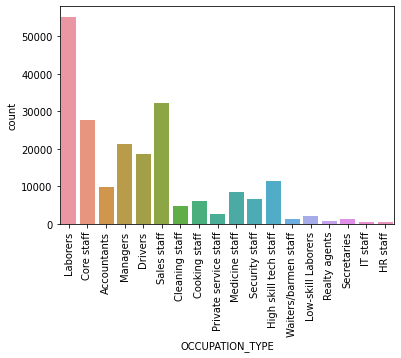

In [13]:
sns.countplot(inp0.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.show()

In [14]:
#Lets fill missing value with 'Unknown' variable
inp0.OCCUPATION_TYPE=inp0.OCCUPATION_TYPE.fillna('Unknown')

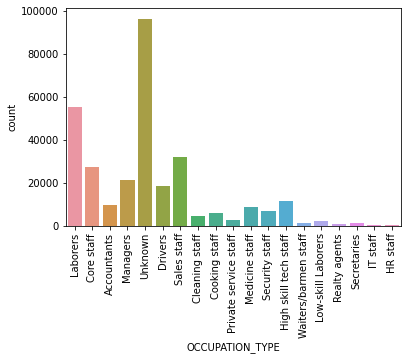

In [15]:
sns.countplot(inp0.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.show()

In [16]:
#Check if it still has missing column
inp0.OCCUPATION_TYPE.isnull().sum()

0

###### YEARS_BEGINEXPLUATATION

In [17]:
inp0.YEARS_BEGINEXPLUATATION_AVG.dtype

dtype('float64')

In [18]:
inp0.YEARS_BEGINEXPLUATATION_AVG.describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

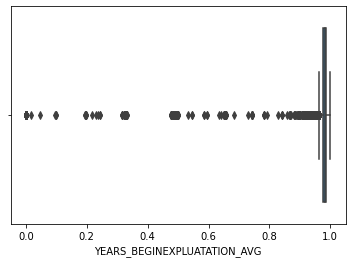

In [19]:
#There is no major difference between Mean and Mode
sns.boxplot(inp0.YEARS_BEGINEXPLUATATION_AVG)
plt.show()

In [20]:
#Majoriy data is between 0.9 and 1.0. Also mean and median are very close.Lets go with mean
inp0.YEARS_BEGINEXPLUATATION_AVG.mean()


0.9777348581623325

In [21]:
#Fill the column with mean
inp0.YEARS_BEGINEXPLUATATION_AVG = inp0.YEARS_BEGINEXPLUATATION_AVG.fillna(inp0.YEARS_BEGINEXPLUATATION_AVG.mean())

In [22]:
#Checking for missing values
inp0.YEARS_BEGINEXPLUATATION_AVG.isnull().sum()

0

In [23]:
#Now YEARS_BEGINEXPLUATATION_MODE column
inp0.YEARS_BEGINEXPLUATATION_MODE.dtype

dtype('float64')

In [24]:
inp0.YEARS_BEGINEXPLUATATION_MODE.describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

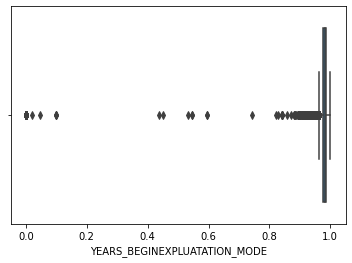

In [25]:
sns.boxplot(inp0.YEARS_BEGINEXPLUATATION_MODE)
plt.show()

In [26]:
#Again filling with mean as mean and median are close enough
inp0.YEARS_BEGINEXPLUATATION_MODE.mean()

0.9770653729429093

In [27]:
inp0.YEARS_BEGINEXPLUATATION_MODE = inp0.YEARS_BEGINEXPLUATATION_MODE.fillna(inp0.YEARS_BEGINEXPLUATATION_MODE.mean())

In [28]:
#Checking null values again
inp0.YEARS_BEGINEXPLUATATION_MODE.isnull().sum()

0

In [29]:
# Checking YEARS_BEGINEXPLUATATION_MEDI column
inp0.YEARS_BEGINEXPLUATATION_MEDI.dtype

dtype('float64')

In [30]:
inp0.YEARS_BEGINEXPLUATATION_MEDI.describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

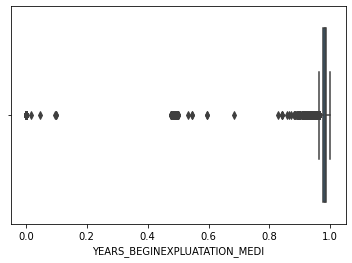

In [31]:
sns.boxplot(inp0.YEARS_BEGINEXPLUATATION_MEDI)
plt.show()

In [32]:
inp0.YEARS_BEGINEXPLUATATION_MEDI.mean()

0.9777522640694839

In [33]:
#Fill with Mean value
inp0.YEARS_BEGINEXPLUATATION_MEDI = inp0.YEARS_BEGINEXPLUATATION_MEDI.fillna(inp0.YEARS_BEGINEXPLUATATION_MEDI.mean())

In [34]:
# Check for null values
inp0.YEARS_BEGINEXPLUATATION_MEDI.isnull().sum()

0

In [35]:
#Checking null values columns with 25%
nullvalper(inp0,25)

FLOORSMAX_AVG : 49.76082156410665
FLOORSMAX_MODE : 49.76082156410665
FLOORSMAX_MEDI : 49.76082156410665
TOTALAREA_MODE : 48.26851722377411
EMERGENCYSTATE_MODE : 47.39830445089769


###### FLOORSMAX column

In [36]:
#FLOORSMAX_AVG
inp0.FLOORSMAX_AVG.dtype

dtype('float64')

In [37]:
inp0.FLOORSMAX_AVG.describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

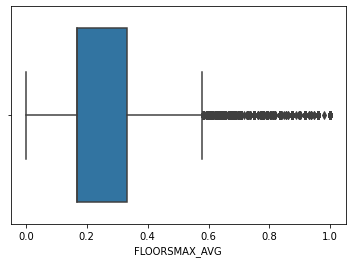

In [38]:
sns.boxplot(inp0.FLOORSMAX_AVG)
plt.show()

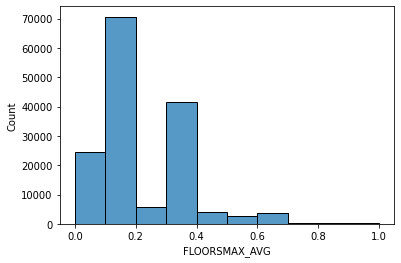

In [39]:
#There are too many Outliers.Checking the spread
sns.histplot(inp0.FLOORSMAX_AVG, bins=10)
plt.show()

In [40]:
# Majority data is near 0.2 section.Checking mode

inp0.FLOORSMAX_AVG.mode()[0]

0.1667

In [41]:
#Imputing with Mode
inp0.FLOORSMAX_AVG = inp0.FLOORSMAX_AVG.fillna(inp0.FLOORSMAX_AVG.mode()[0])

In [42]:
inp0.FLOORSMAX_AVG.isnull().sum()

0

In [43]:
#FLOORSMAX_MODE
inp0.FLOORSMAX_MODE.dtype

dtype('float64')

In [44]:
inp0.FLOORSMAX_MODE.describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

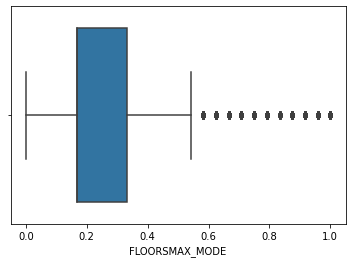

In [45]:
sns.boxplot(inp0.FLOORSMAX_MODE)
plt.show()

In [46]:
#Lets impute with Mean as there are not many Outliers
inp0.FLOORSMAX_MODE = inp0.FLOORSMAX_MODE.fillna(inp0.FLOORSMAX_MODE.mean())

In [47]:
inp0.FLOORSMAX_MODE.isnull().sum()

0

In [48]:
# FLOORSMAX_MEDI
inp0.FLOORSMAX_MEDI.dtype

dtype('float64')

In [49]:
inp0.FLOORSMAX_MEDI.describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

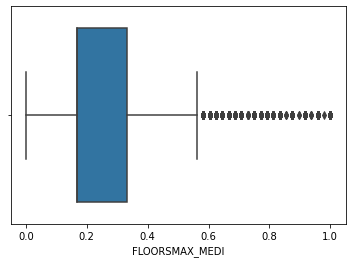

In [50]:
sns.boxplot(inp0.FLOORSMAX_MEDI)
plt.show()

In [51]:
#Lets impute with Mean as there are not many Outliers
inp0.FLOORSMAX_MEDI = inp0.FLOORSMAX_MEDI.fillna(inp0.FLOORSMAX_MEDI.mean())

In [52]:
inp0.FLOORSMAX_MEDI.isnull().sum()

0

In [53]:
#Checking null values columns with 25%
nullvalper(inp0,25)

TOTALAREA_MODE : 48.26851722377411
EMERGENCYSTATE_MODE : 47.39830445089769


###### TOTALAREA_MODE

In [54]:
#TOTALAREA_MODE
inp0.TOTALAREA_MODE.dtype

dtype('float64')

In [55]:
inp0.TOTALAREA_MODE.describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

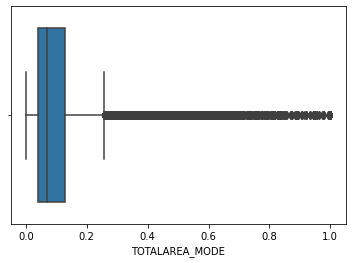

In [56]:
sns.boxplot(inp0.TOTALAREA_MODE)
plt.show()

In [57]:
#Too many Outliers, Mean would not be a good option.Lets go with Median
inp0.TOTALAREA_MODE.median()

0.0688

In [58]:
inp0.TOTALAREA_MODE = inp0.TOTALAREA_MODE.fillna(inp0.TOTALAREA_MODE.median())

In [59]:
inp0.TOTALAREA_MODE.isnull().sum()

0

###### EMERGENCYSTATE_MODE

In [60]:
inp0.EMERGENCYSTATE_MODE.dtype

dtype('O')

In [61]:
inp0.EMERGENCYSTATE_MODE.value_counts(normalize=True)

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64

In [62]:
inp0.EMERGENCYSTATE_MODE.mode()[0]

'No'

In [63]:
#Around 98% have No as respone.Lets impute missing with mode.
inp0.EMERGENCYSTATE_MODE = inp0.EMERGENCYSTATE_MODE.fillna(inp0.EMERGENCYSTATE_MODE.mode()[0])

In [64]:
inp0.EMERGENCYSTATE_MODE.isnull().sum()

0

In [65]:
# Checking null values again above 1 percent
nullvalper(inp0,1)

EXT_SOURCE_3 : 19.825307062186393
AMT_REQ_CREDIT_BUREAU_HOUR : 13.501630835970095
AMT_REQ_CREDIT_BUREAU_DAY : 13.501630835970095
AMT_REQ_CREDIT_BUREAU_WEEK : 13.501630835970095
AMT_REQ_CREDIT_BUREAU_MON : 13.501630835970095
AMT_REQ_CREDIT_BUREAU_QRT : 13.501630835970095
AMT_REQ_CREDIT_BUREAU_YEAR : 13.501630835970095


In [66]:
#EXT_SOURCE_3 
inp0.EXT_SOURCE_3.dtype

dtype('float64')

In [67]:
inp0.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

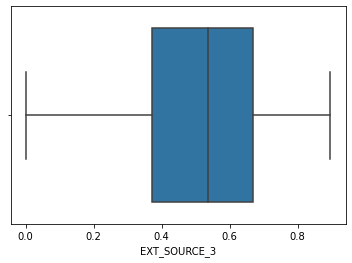

In [68]:
sns.boxplot(inp0.EXT_SOURCE_3)
plt.show()

In [69]:
#Imputing with Median of the variable
inp0.EXT_SOURCE_3 = inp0.EXT_SOURCE_3.fillna(inp0.EXT_SOURCE_3.mean())

In [70]:
inp0.EXT_SOURCE_3.isnull().sum()

0

In [71]:
# AMT_REQ_CREDIT_BUREAU_HOUR
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.dtype

dtype('float64')

In [72]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [73]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

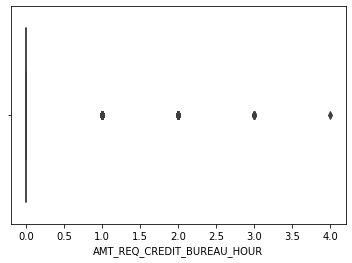

In [74]:
sns.boxplot(inp0.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.show()

In [75]:
#The values are 0,1,2,3,4 So Mean wont make sense.Lets check Mode
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]

0.0

In [76]:
#Imputing with mode
inp0.AMT_REQ_CREDIT_BUREAU_HOUR = inp0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])

In [77]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [78]:
#Similarly for all columns
inp0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [79]:
#Imputing with mode
inp0.AMT_REQ_CREDIT_BUREAU_DAY = inp0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])

In [80]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [81]:
#AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR

In [82]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [83]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK = inp0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(inp0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])

In [84]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [85]:
inp0.AMT_REQ_CREDIT_BUREAU_MON = inp0.AMT_REQ_CREDIT_BUREAU_MON.fillna(inp0.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])

In [86]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [87]:
print('Mode: ',inp0.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])
print('Median: ',inp0.AMT_REQ_CREDIT_BUREAU_QRT.median())

Mode:  0.0
Median:  0.0


In [88]:
#Mean,Median,mode are same
inp0.AMT_REQ_CREDIT_BUREAU_QRT = inp0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(inp0.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])

In [89]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [90]:
print('Mode: ',inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])
print('Median: ',inp0.AMT_REQ_CREDIT_BUREAU_YEAR.median())
print('Mean: ',inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mean())

Mode:  0.0
Median:  1.0
Mean:  1.899974435321363


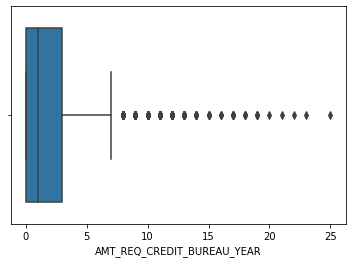

In [91]:
sns.boxplot(inp0.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

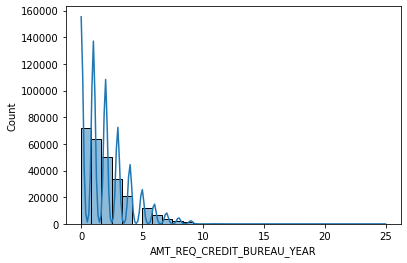

In [92]:
sns.histplot(inp0.AMT_REQ_CREDIT_BUREAU_YEAR, bins=30, kde=True)
plt.show()

In [93]:
#Imputing with median value.
inp0.AMT_REQ_CREDIT_BUREAU_YEAR = inp0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(inp0.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [94]:
nullvalper(inp0,1.0)

In [95]:
#No nullvalues above 1 percent.Lets check missing values column.
nullvalper(inp0,0.0)

AMT_ANNUITY : 0.0039022994299390914
AMT_GOODS_PRICE : 0.09040327012692229
NAME_TYPE_SUITE : 0.42014757195677555
CNT_FAM_MEMBERS : 0.000650383238323182
EXT_SOURCE_2 : 0.21462646864665003
OBS_30_CNT_SOCIAL_CIRCLE : 0.3320206431639844
DEF_30_CNT_SOCIAL_CIRCLE : 0.3320206431639844
OBS_60_CNT_SOCIAL_CIRCLE : 0.3320206431639844
DEF_60_CNT_SOCIAL_CIRCLE : 0.3320206431639844
DAYS_LAST_PHONE_CHANGE : 0.000325191619161591


In [96]:
#Lets delete these rows as these are very small numbers
inp0.shape

(307511, 81)

In [97]:
inp0.dropna(axis=0, inplace=True)

In [98]:
nullvalper(inp0,0.0)

In [99]:
inp0.shape

(304531, 81)

Now there are missing values in the dataset

In [100]:
#Lets check columns
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [101]:
#Lets check categorical columns
inp0_cat=inp0.columns[inp0.dtypes==object]

In [102]:
#Lets check individual values in each column
for i in inp0_cat:
    print(i,':\n',inp0[i].value_counts(),'\n')

NAME_CONTRACT_TYPE :
 Cash loans         276613
Revolving loans     27918
Name: NAME_CONTRACT_TYPE, dtype: int64 

CODE_GENDER :
 F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64 

FLAG_OWN_CAR :
 N    200910
Y    103621
Name: FLAG_OWN_CAR, dtype: int64 

FLAG_OWN_REALTY :
 Y    211641
N     92890
Name: FLAG_OWN_REALTY, dtype: int64 

NAME_TYPE_SUITE :
 Unaccompanied      247112
Family              39969
Spouse, partner     11313
Children             3249
Other_B              1757
Other_A               864
Group of people       267
Name: NAME_TYPE_SUITE, dtype: int64 

NAME_INCOME_TYPE :
 Working                 157341
Commercial associate     70794
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64 

NAME_EDUCATION_TYPE :
 Secondary / secondary special    216582
Higher education             

We can see there are some values in the columns denoted as XNA. These could be some error in data or unknown values. For eg. Gender cannot be XNA. Lets replace them with null values

In [103]:
#Replacing XNA with np.nan
for i in inp0_cat:
    inp0[i]=inp0[i].replace('XNA', np.nan)

In [104]:
#Now Lets check individual values in each column
for i in inp0_cat:
    print(i,':\n',inp0[i].value_counts(),'\n')

NAME_CONTRACT_TYPE :
 Cash loans         276613
Revolving loans     27918
Name: NAME_CONTRACT_TYPE, dtype: int64 

CODE_GENDER :
 F    200482
M    104045
Name: CODE_GENDER, dtype: int64 

FLAG_OWN_CAR :
 N    200910
Y    103621
Name: FLAG_OWN_CAR, dtype: int64 

FLAG_OWN_REALTY :
 Y    211641
N     92890
Name: FLAG_OWN_REALTY, dtype: int64 

NAME_TYPE_SUITE :
 Unaccompanied      247112
Family              39969
Spouse, partner     11313
Children             3249
Other_B              1757
Other_A               864
Group of people       267
Name: NAME_TYPE_SUITE, dtype: int64 

NAME_INCOME_TYPE :
 Working                 157341
Commercial associate     70794
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64 

NAME_EDUCATION_TYPE :
 Secondary / secondary special    216582
Higher education                  73821
Incompl

Identifying extremities.

In [105]:
#CNT_CHILDREN
inp0.CNT_CHILDREN.value_counts()

0     213277
1      60520
2      26502
3       3680
4        426
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [106]:
#It is very rare that count of children can be more than 5. Also considering family expense, they will not be able top pay the loan
#Hence it is safe to drop them from the dataset
inp0 = inp0[~(inp0.CNT_CHILDREN>5)]

In [107]:
#Lets look at TARGET column.
inp0.TARGET.value_counts()

0    279831
1     24658
Name: TARGET, dtype: int64

In [108]:
#1 = people with payment difficulty
#0 = No difficulty
#Creating a new column of Y or N for understanding
inp0['Payment_Difficulty']=inp0.TARGET.apply(lambda x: 'Y' if x==1 else 'N')

In [109]:
inp0.Payment_Difficulty.value_counts()

N    279831
Y     24658
Name: Payment_Difficulty, dtype: int64

In [110]:
def CountP(df, xval, yval='Payment_Difficulty'):
    sns.countplot(data = df, x=xval, hue=yval)
    plt.show()

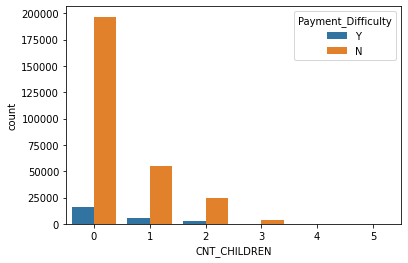

In [111]:
#Checking plot of CNT_CHILDREN 
CountP(inp0, inp0.CNT_CHILDREN)

In [112]:
#Checking out age 0f clients
inp0.DAYS_BIRTH.value_counts()

-13749    42
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-7856      1
-25116     1
-23856     1
-7891      1
-25061     1
Name: DAYS_BIRTH, Length: 17458, dtype: int64

In [113]:
inp0.DAYS_BIRTH=abs(inp0.DAYS_BIRTH)

<AxesSubplot:ylabel='Frequency'>

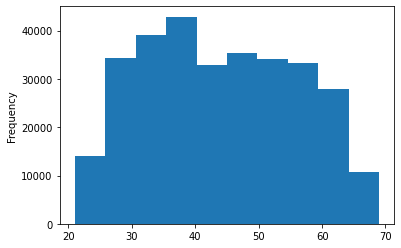

In [114]:
#TO check age
inp0['AGE']=(inp0.DAYS_BIRTH/365).round(decimals=0)
inp0.AGE.plot.hist()

In [115]:
inp0['AGE']=pd.cut(inp0.AGE,bins=[0,25,55,100],labels=['Young','Adult','Old'])

In [116]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Payment_Difficulty,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Y,Adult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,N,Adult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,N,Adult
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,N,Adult
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,N,Adult


In [117]:
inp0.DAYS_EMPLOYED = abs(inp0.DAYS_EMPLOYED)


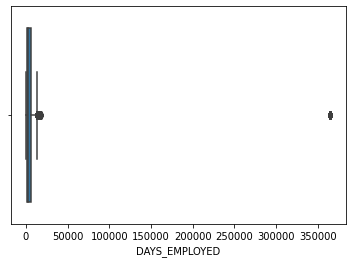

In [118]:
sns.boxplot(inp0.DAYS_EMPLOYED)
plt.show()

In [119]:
inp0.DAYS_EMPLOYED.quantile([0,.25,.4,.7,.9,.99])

0.00         0.0
0.25       934.0
0.40      1599.0
0.70      4439.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [120]:
#Filtering out data and removing outliers
inp0 = inp0[inp0.DAYS_EMPLOYED<4500]

In [121]:
inp0['YEARS_EMPLOYED']=(inp0.DAYS_EMPLOYED/365).round(1)

In [122]:
inp0['YEARS_EMPLOYED'].dtype

dtype('float64')

In [123]:
inp0['YEARS_EMPLOYED'].describe()

count    214052.000000
mean          4.428068
std           3.139988
min           0.000000
25%           1.800000
50%           3.700000
75%           6.600000
max          12.300000
Name: YEARS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='YEARS_EMPLOYED', ylabel='Count'>

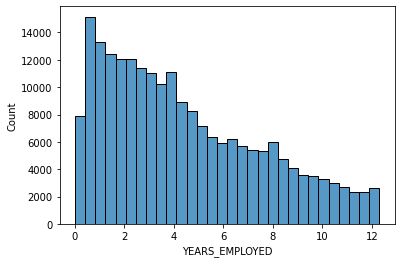

In [124]:
sns.histplot(inp0.YEARS_EMPLOYED, bins=30)

<AxesSubplot:ylabel='NAME_FAMILY_STATUS'>

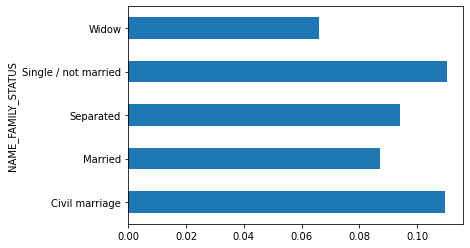

In [125]:
inp0.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.barh()

In [126]:
inp0_cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

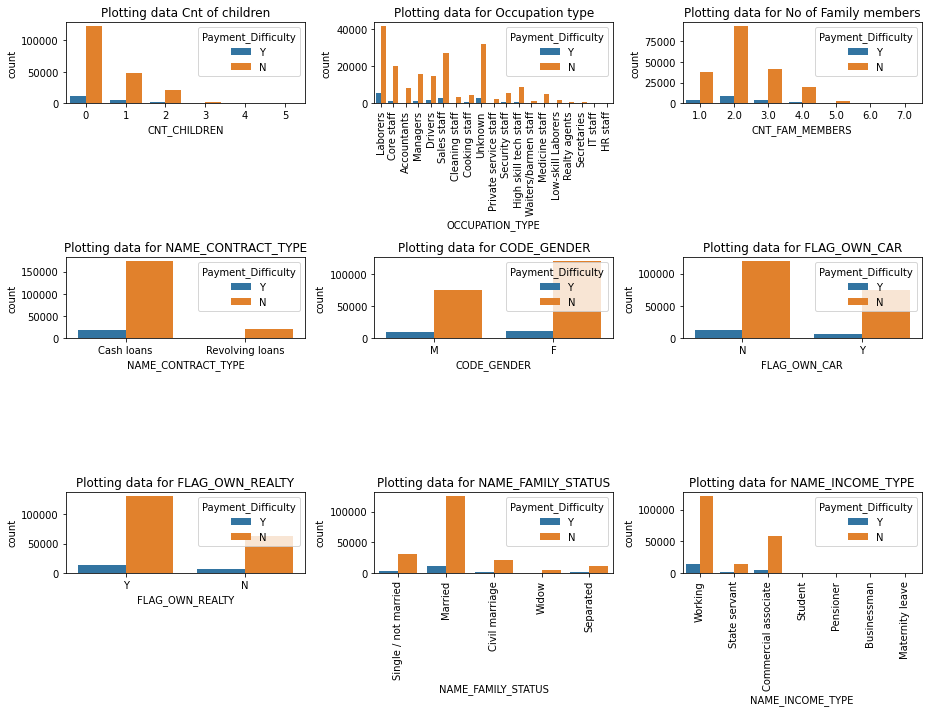

In [127]:
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(331)
    sns.countplot(x= inp0.CNT_CHILDREN, hue = 'Payment_Difficulty', data = inp0, ax = ax1)
    plt.title('Plotting data Cnt of children')
    
    ax2 = plt.subplot(332)
    sns.countplot(x= inp0.OCCUPATION_TYPE, hue = 'Payment_Difficulty', data = inp0, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Occupation type')


    ax3 = plt.subplot(333)
    sns.countplot(x= inp0.CNT_FAM_MEMBERS, hue = 'Payment_Difficulty', data = inp0, ax = ax3)
    plt.title('Plotting data for No of Family members')
    
    ax4 = plt.subplot(334)
    sns.countplot(x= inp0.NAME_CONTRACT_TYPE, hue = 'Payment_Difficulty', data = inp0, ax = ax4)
    plt.title('Plotting data for NAME_CONTRACT_TYPE')    
    
    ax5 = plt.subplot(335)
    sns.countplot(x= inp0.CODE_GENDER, hue = 'Payment_Difficulty', data = inp0, ax = ax5)
    plt.title('Plotting data for CODE_GENDER')       
    
    ax6 = plt.subplot(336)
    sns.countplot(x= inp0.FLAG_OWN_CAR, hue = 'Payment_Difficulty', data = inp0, ax = ax6)
    plt.title('Plotting data for FLAG_OWN_CAR')           
    
    ax7 = plt.subplot(337)
    sns.countplot(x= inp0.FLAG_OWN_REALTY, hue = 'Payment_Difficulty', data = inp0, ax = ax7)
    plt.title('Plotting data for FLAG_OWN_REALTY')           
    
    
    ax8 = plt.subplot(338)
    sns.countplot(x= inp0.NAME_FAMILY_STATUS, hue = 'Payment_Difficulty', data = inp0, ax = ax8)
    plt.xticks(rotation=90)
    plt.title('Plotting data for NAME_FAMILY_STATUS')           
    
    ax9 = plt.subplot(339)
    sns.countplot(x= inp0.NAME_INCOME_TYPE, hue = 'Payment_Difficulty', data = inp0, ax = ax9)
    plt.xticks(rotation=90)
    plt.title('Plotting data for NAME_INCOME_TYPE')           
    
    fig.tight_layout()

    plt.show()


In [128]:
#This is confusing data.lets only observe people having difficulty

DiffcultyYes = inp0[inp0.Payment_Difficulty=='Y']

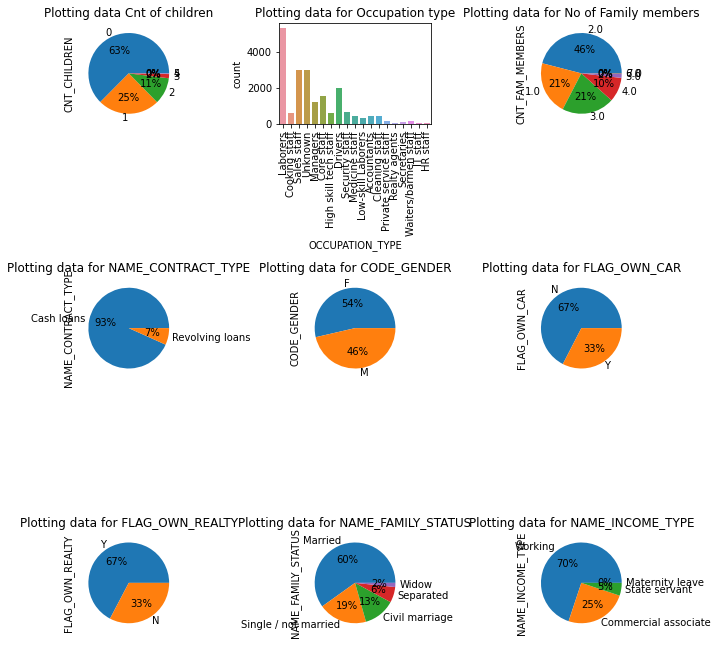

In [129]:
    fig = plt.figure(figsize=(10,9))
    
    ax1 = plt.subplot(331)
    DiffcultyYes.CNT_CHILDREN.value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data Cnt of children')
    
    ax2 = plt.subplot(332)
    sns.countplot(x= DiffcultyYes.OCCUPATION_TYPE, data = inp0, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Occupation type')

    ax3 = plt.subplot(333)
    DiffcultyYes.CNT_FAM_MEMBERS.value_counts().plot.pie(autopct = "%1.0f%%", ax=ax3)
    plt.title('Plotting data for No of Family members')
    
    ax4 = plt.subplot(334)
    DiffcultyYes.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%", ax=ax4)
    plt.title('Plotting data for NAME_CONTRACT_TYPE')    
    
    ax5 = plt.subplot(335)
    DiffcultyYes.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%", ax=ax5)
    plt.title('Plotting data for CODE_GENDER')       
    
    ax6 = plt.subplot(336)
    DiffcultyYes.FLAG_OWN_CAR.value_counts().plot.pie(autopct = "%1.0f%%", ax=ax6)
    plt.title('Plotting data for FLAG_OWN_CAR')           
    
    ax7 = plt.subplot(337)
    DiffcultyYes.FLAG_OWN_REALTY.value_counts().plot.pie(autopct = "%1.0f%%", ax=ax7)
    plt.title('Plotting data for FLAG_OWN_REALTY')           
    
    
    ax8 = plt.subplot(338)
    #sns.countplot(x= DiffcultyYes.NAME_FAMILY_STATUS,   data = DiffcultyYes, ax = ax8)
    DiffcultyYes.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = "%1.0f%%", ax=ax8)
    #plt.xticks(rotation=90)
    plt.title('Plotting data for NAME_FAMILY_STATUS')           
    
    ax9 = plt.subplot(339)
    DiffcultyYes.NAME_INCOME_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%", ax=ax9)
    plt.title('Plotting data for NAME_INCOME_TYPE')           
    
    fig.tight_layout()

    plt.show()


From the above charts we can safely derive certain conclusions that:
- People having 0 children have more difficulty in paying the loan
- Labourers,Drivers,Sales staff should be ignored while looking at Occupations.We do not have much information about Unknown type.
- Family of 1,2 and 3 contribute more in payment difficulty.It is also possible that we do not have much data about 3+ families to  derive any conclusion
- Cash loans are more likely to be defaulted than revolving loans
- Females have more difficulties in repayment.
- People who own real house have more diffculty in saing yes. This is probably due to ongoing EMI we have to explore this more.
- Married have more probabilty of defaulting.We have to be careful here
- Working staff are more likely to default.

#### Performing bivariate analysis on two columns

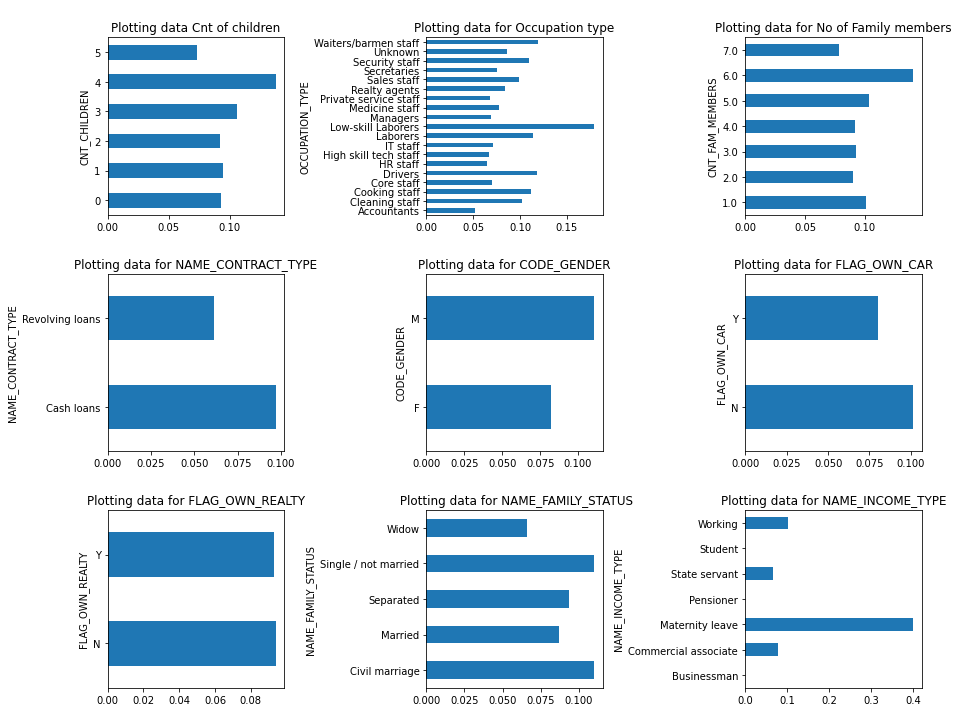

In [130]:
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(331)
    inp0.groupby('CNT_CHILDREN')['TARGET'].mean().plot.barh(ax=ax1)
    plt.title('\nPlotting data Cnt of children')
    
    ax2 =plt.subplot(332)
    inp0.groupby('OCCUPATION_TYPE')['TARGET'].mean().plot.barh(ax=ax2)
    plt.title('\nPlotting data for Occupation type')

    ax3 = plt.subplot(333)
    inp0.groupby('CNT_FAM_MEMBERS')['TARGET'].mean().plot.barh(ax=ax3)
    plt.title('\nPlotting data for No of Family members')
    
    ax4 = plt.subplot(334)
    inp0.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().plot.barh(ax=ax4)
    plt.title('\nPlotting data for NAME_CONTRACT_TYPE')    
    
    ax5 = plt.subplot(335)
    inp0.groupby('CODE_GENDER')['TARGET'].mean().plot.barh(ax=ax5)
    plt.title('\nPlotting data for CODE_GENDER')       
    
    ax6 = plt.subplot(336)
    inp0.groupby('FLAG_OWN_CAR')['TARGET'].mean().plot.barh(ax=ax6)
    plt.title('\nPlotting data for FLAG_OWN_CAR')           
    
    ax7 = plt.subplot(337)
    inp0.groupby('FLAG_OWN_REALTY')['TARGET'].mean().plot.barh(ax=ax7)
    plt.title('\nPlotting data for FLAG_OWN_REALTY')           
    
    
    ax8 = plt.subplot(338)
    #sns.countplot(x= DiffcultyYes.NAME_FAMILY_STATUS,   data = DiffcultyYes, ax = ax8)
    inp0.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.barh(ax=ax8)
    #plt.xticks(rotation=90)
    plt.title('\n Plotting data for NAME_FAMILY_STATUS')           
    
    ax9 = plt.subplot(339)
    inp0.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot.barh(ax=ax9)
    plt.title('\nPlotting data for NAME_INCOME_TYPE')           
    
    fig.tight_layout()

    plt.show()


From the above charts we can safely derive certain conclusions that:
- Clients having 3 or more children have more difficulty in paying the loan
- Clients in the occupations like LOWSKILL LABOURERS, WAITER/BARMEN STAFF,LABOURERS DRIVERS, COOKING/CLEANING STAFF will have problems in repaying the loan
- Family of 3 or more contribute more in payment difficulty to repay loan.
- Cash loans are more likely to be defaulted than revolving loans
- Males have more difficulties in repayment.
- Clients who do not own house or cars have more diffculty in repayment of loan.Although difference is not much and needs more exploration.
- Clients with civil marriage and bachelors have more difficult in paying loans
- Clients who are unemployed, on Maternity leave should not be given loans.

In [131]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [132]:
inp0.shape

(214052, 84)

In [133]:
inp0.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [134]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [135]:
inp0.drop(['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',],axis=1,inplace=True)

In [136]:
inp0.drop(['LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION'],axis=1,inplace=True)

In [137]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_W

In [138]:
inp0.drop(['REGION_POPULATION_RELATIVE','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'],axis=1,inplace=True)

In [139]:
inp0.shape

(214052, 47)

### Previous application dataset


In [140]:
inp1 = pd.read_csv('previous_application.csv')
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
inp1.shape

(1670214, 37)

In [142]:
inp1.describe().columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [143]:
list(set(inp1.columns) - set(inp1.describe().columns))

['NAME_CASH_LOAN_PURPOSE',
 'NAME_YIELD_GROUP',
 'NAME_GOODS_CATEGORY',
 'NAME_SELLER_INDUSTRY',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_TYPE_SUITE',
 'NAME_PRODUCT_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_PAYMENT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CLIENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_REJECT_REASON']

In [144]:
inp1.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [145]:
#Checking columns with 50% missing data
inp1.columns[inp1.isnull().sum()>(len(inp1)/2)]

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [146]:
#Drop these columns
inp1.drop(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],axis=1, inplace=True)

In [147]:
inp1.shape

(1670214, 33)

In [148]:
#Using our defined function to check other missing values

nullvalper(inp1,1)

AMT_ANNUITY : 22.286665062081866
AMT_GOODS_PRICE : 23.08177275486854
NAME_TYPE_SUITE : 49.11975351661523
CNT_PAYMENT : 22.286365699245724
DAYS_FIRST_DRAWING : 40.29812946125467
DAYS_FIRST_DUE : 40.29812946125467
DAYS_LAST_DUE_1ST_VERSION : 40.29812946125467
DAYS_LAST_DUE : 40.29812946125467
DAYS_TERMINATION : 40.29812946125467
NFLAG_INSURED_ON_APPROVAL : 40.29812946125467


###### Imputing these missing values

In [149]:
#DAYS_TERMINATION ,DAYS_LAST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_FIRST_DUE,DAYS_FIRST_DRAWING
# Dropping these columns as data is unclear and values may create problem in analysis

In [150]:
inp1.drop(['DAYS_TERMINATION' ,'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE','DAYS_FIRST_DRAWING'],axis=1, inplace=True)

In [151]:
inp1.shape

(1670214, 28)

In [152]:
nullvalper(inp1,1)

AMT_ANNUITY : 22.286665062081866
AMT_GOODS_PRICE : 23.08177275486854
NAME_TYPE_SUITE : 49.11975351661523
CNT_PAYMENT : 22.286365699245724
NFLAG_INSURED_ON_APPROVAL : 40.29812946125467


In [153]:
inp1.NAME_TYPE_SUITE.dtype

dtype('O')

In [154]:
inp1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [155]:
inp1.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [156]:
inp1.NAME_TYPE_SUITE= inp1.NAME_TYPE_SUITE.fillna(inp1.NAME_TYPE_SUITE.mode()[0])

In [157]:
inp1.NAME_TYPE_SUITE.isnull().sum()

0

In [158]:
#AMT_ANNUITY
inp1.AMT_ANNUITY.dtype

dtype('float64')

In [159]:
inp1.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

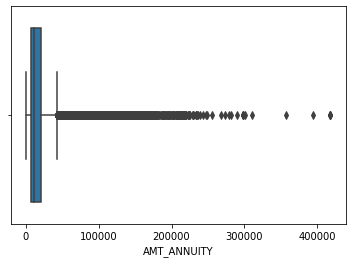

In [160]:
sns.boxplot(inp1.AMT_ANNUITY)
plt.show()

In [161]:
#There are 2 many Outliers , Lets take median instead of mean for imputing
inp1.AMT_ANNUITY = inp1.AMT_ANNUITY.fillna(inp1.AMT_ANNUITY.median())

In [162]:
inp1.AMT_ANNUITY.isnull().sum()

0

In [163]:
#AMT_GOODS_PRICE 
inp1.AMT_GOODS_PRICE.dtype

dtype('float64')

In [164]:
inp1.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

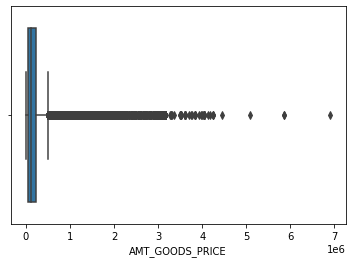

In [165]:
sns.boxplot(inp1.AMT_GOODS_PRICE)
plt.show()

In [166]:
#There are 2 many Outliers , Lets take median instead of mean for imputing
inp1.AMT_GOODS_PRICE = inp1.AMT_GOODS_PRICE.fillna(inp1.AMT_GOODS_PRICE.median())

In [167]:
inp1.AMT_GOODS_PRICE.isnull().sum()

0

In [168]:
#CNT_PAYMENT
inp1.CNT_PAYMENT.dtype

dtype('float64')

In [169]:
inp1.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

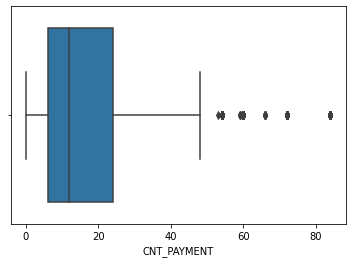

In [170]:
sns.boxplot(inp1.CNT_PAYMENT)
plt.show()

In [171]:
#We can take mean for imputing
inp1.CNT_PAYMENT = inp1.CNT_PAYMENT.fillna(inp1.CNT_PAYMENT.mean())
inp1.CNT_PAYMENT.isnull().sum()

0

In [172]:
#NFLAG_INSURED_ON_APPROVAL
inp1.NFLAG_INSURED_ON_APPROVAL.dtype

dtype('float64')

In [173]:
inp1.NFLAG_INSURED_ON_APPROVAL.describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

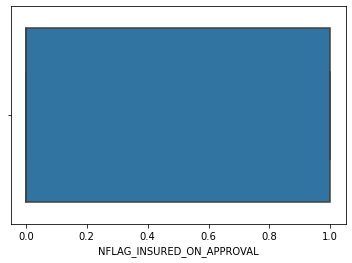

In [174]:
sns.boxplot(inp1.NFLAG_INSURED_ON_APPROVAL)
plt.show()

In [175]:
#It has values as 0 or 1 . It is categorical data.lets impute with mode.
inp1.NFLAG_INSURED_ON_APPROVAL.mode()[0]

0.0

In [176]:
inp1.NFLAG_INSURED_ON_APPROVAL = inp1.NFLAG_INSURED_ON_APPROVAL.fillna(inp1.NFLAG_INSURED_ON_APPROVAL.mode()[0])
inp1.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

0

In [177]:
#Checking Null values again
nullvalper(inp1)

AMT_CREDIT : 5.9872567227912114e-05
PRODUCT_COMBINATION : 0.02071590826085759


As AMT_CREDIT and PRODUCT_COMBINATION have very small amount of missing values. So just dropping them

In [178]:
inp1.dropna(inplace=True)

In [179]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,0.0


In [180]:
#Checkin null values
inp1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int64

In [181]:
#Taking a sample of dataset
inp1 = inp1.sample(25000)

In [182]:
inp1.SK_ID_PREV.value_counts()

2456460    1
1098891    1
1448266    1
1800005    1
2732812    1
          ..
1870177    1
2302928    1
2034870    1
1226945    1
2818801    1
Name: SK_ID_PREV, Length: 25000, dtype: int64

There are no missing values in the datsets.

In [183]:
df_new = inp0.merge(inp1, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [184]:
df_new.shape

(14488, 74)

In [185]:
df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.000000,middle,Cash X-Sell: middle,1.0
1,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,Furniture,POS,XNA,Stone,408,Furniture,10.000000,low_normal,POS industry without interest,1.0
2,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,XNA,XNA,XNA,Credit and cash offices,-1,XNA,16.054082,XNA,Cash,0.0
3,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Clothing and Accessories,POS,XNA,Stone,50,Clothing,12.000000,high,POS industry with interest,0.0
4,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,Audio/Video,POS,XNA,Country-wide,2000,Consumer electronics,24.000000,low_action,POS household without interest,0.0


In [186]:
df_new.SK_ID_CURR.value_counts()

348206    4
385382    4
115564    4
169163    3
327462    3
         ..
222833    1
222849    1
222856    1
222878    1
456247    1
Name: SK_ID_CURR, Length: 13734, dtype: int64

In [187]:
df_new['INCOME_qcut']=pd.cut(df_new.AMT_INCOME_TOTAL,bins=[25000,70000,350000,2000000], labels=['Entry','Med-Senior','Management'])

In [188]:
# Segregating the new dataset as same as the old dataset.

ptrain0 = df_new.loc[df_new['TARGET']==0]
ptrain1 = df_new.loc[df_new['TARGET']==1]

### Plotting bar graph for Target = 0 and Target = 1  for single variable.

In [189]:
def percplot(column):
    
    l = df_new[column].value_counts().index.tolist()
    
    d={}
    for i in range(0,len(l)):
        d1={l[i]:[(100*ptrain0['NAME_EDUCATION_TYPE'].value_counts()[i])/(df_new['NAME_EDUCATION_TYPE'].value_counts()[i]),
                         100*(1-((ptrain0['NAME_EDUCATION_TYPE'].value_counts()[i])/(df_new['NAME_EDUCATION_TYPE'].value_counts()[i])))]}#,
     #(ptrain0['NAME_EDUCATION_TYPE'].value_counts()[i])/(df_new['NAME_EDUCATION_TYPE'].value_counts()[i])]}
        d.update(d1)
        
    bardf = pd.DataFrame.from_dict(d, orient='index')
    bardf=bardf.round(decimals=2)
    
    plt.style.use('fivethirtyeight')
    ax=bardf.plot(kind='bar', figsize=(10,4))
    plt.title('Percentage of Target= 0 & 1 for '+column+'\n')
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [190]:
df_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREA

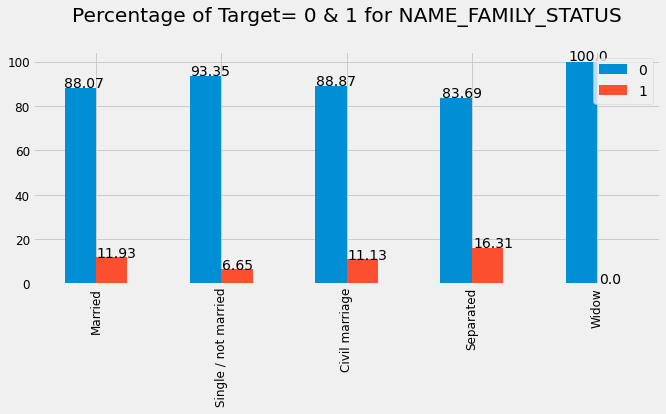

In [191]:
percplot('NAME_FAMILY_STATUS')

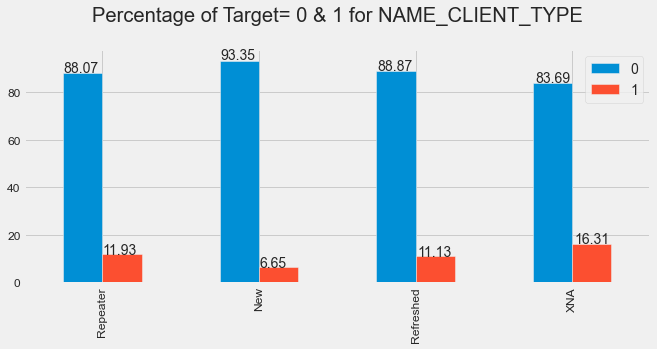

In [242]:
percplot('NAME_CLIENT_TYPE')

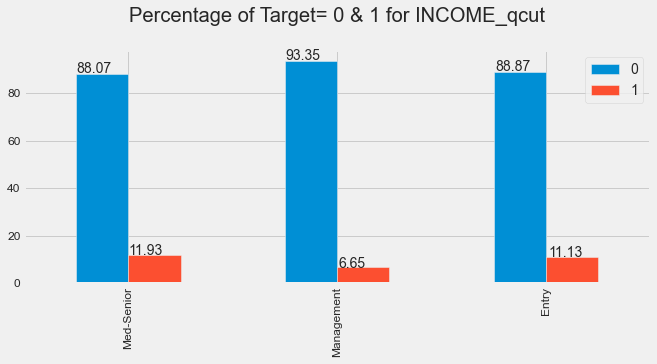

In [248]:
percplot('INCOME_qcut')

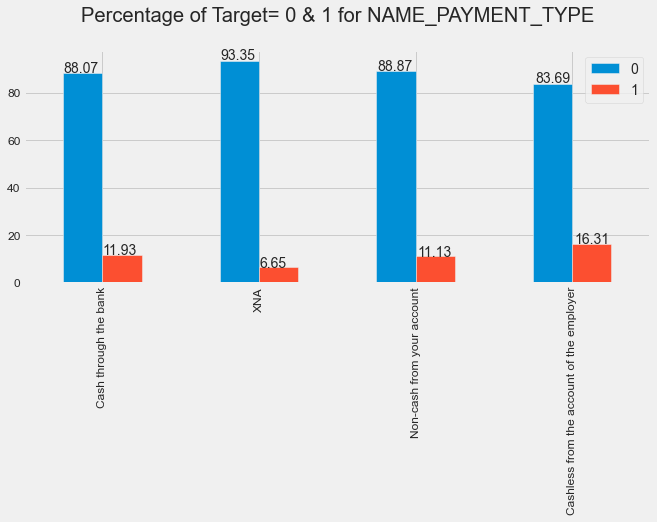

In [245]:
percplot('NAME_PAYMENT_TYPE')

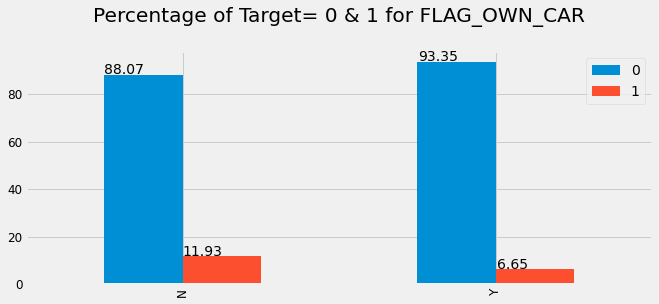

In [193]:
percplot('FLAG_OWN_CAR')

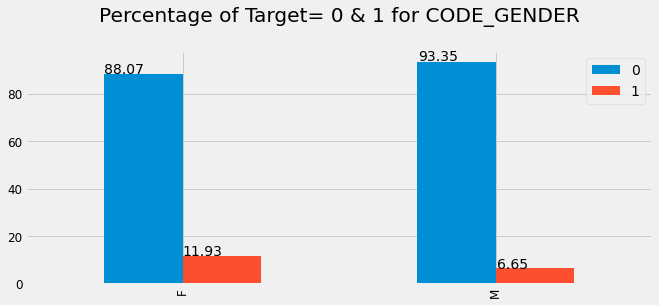

In [194]:
percplot('CODE_GENDER')

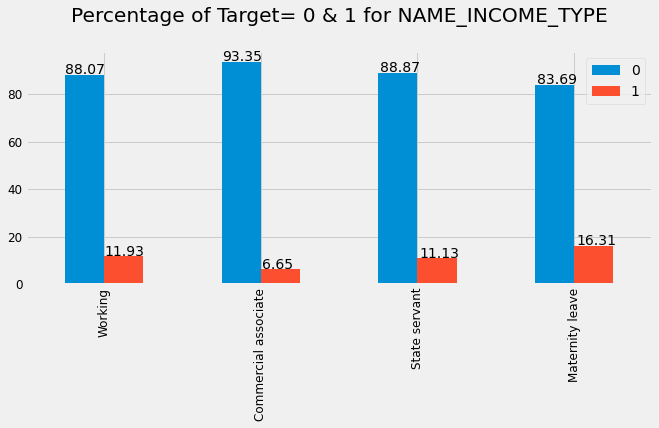

In [195]:
percplot('NAME_INCOME_TYPE')

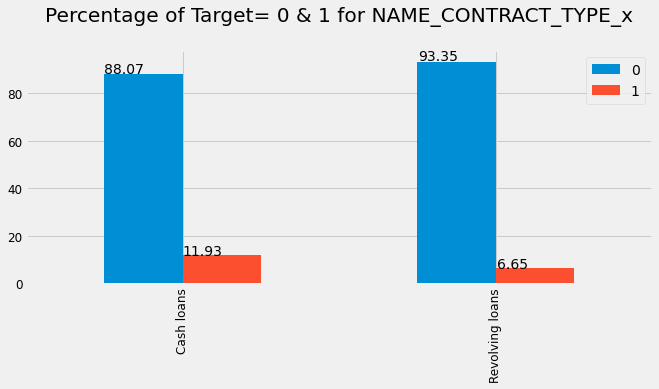

In [196]:
percplot('NAME_CONTRACT_TYPE_x')

In [197]:
l = df_new['NAME_FAMILY_STATUS'].value_counts().index.tolist()
l

['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow']

In [198]:
def plotting(column,hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=[10,10])
    
    sns.set_style('whitegrid')
    
    ax1 = plt.subplot(221)
    ptrain0[col].value_counts().plot.pie(autopct = '%1.0f%%',ax=ax1)
    plt.title("Plotting data for " + column +' for target = 0')
    
    
    ax2 = plt.subplot(222)
    df2 = pd.DataFrame()
    df2['Target = 0'] = (100*(ptrain0[col].value_counts())/len(ptrain0))
    df2['Target = 1'] = (100*(ptrain1[col].value_counts())/len(ptrain1))
    df2.plot.bar(ax=ax2)
    plt.title('Plotting on terms of count for '+column)
    
    ax3 = plt.subplot(223)
    sns.countplot(x=col,hue=hue,data = ptrain0,ax=ax3)
    plt.title('Plotting for Target=0 in terms of count')
    plt.xticks(rotation=90)
    
    
    ax4 =plt.subplot(224)
    sns.countplot(x=col,hue=hue,data = ptrain1,ax=ax4)
    plt.title('Plotting of Target=1 in terms of count')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

In [199]:
ptrain_categorical = df_new.select_dtypes(include=['object']).columns
ptrain_categorical

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE', 'Payment_Difficulty', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

### Analysing every column of the dataset is not feasible beacuse the dataset is too large in size and looping through all the columns will take much time and the system is also lagging.

In [200]:
# Analysing only 5 columns 'CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','CHANNEL_TYPE'.

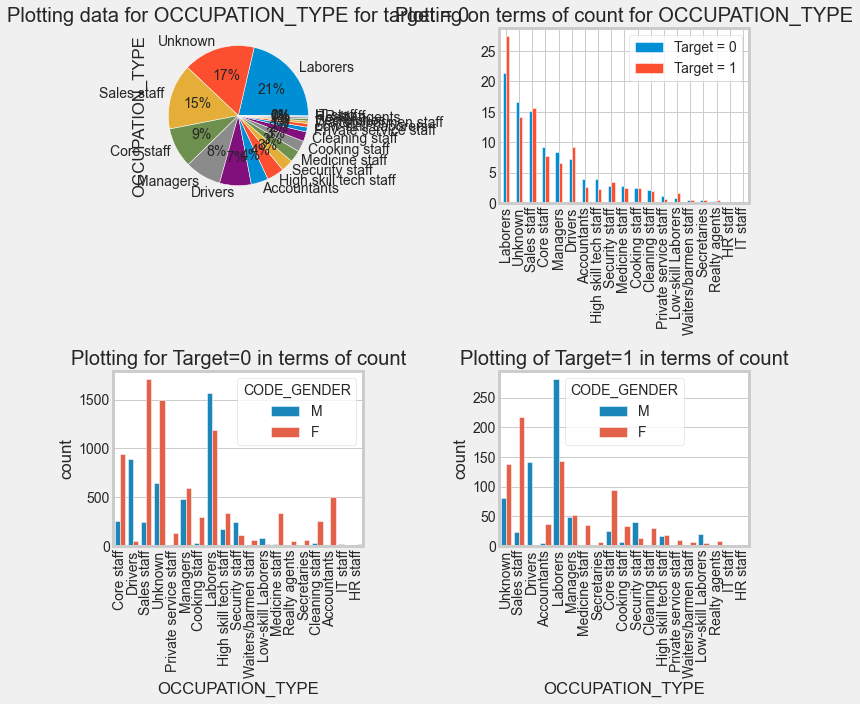

In [201]:
plotting('OCCUPATION_TYPE','CODE_GENDER')

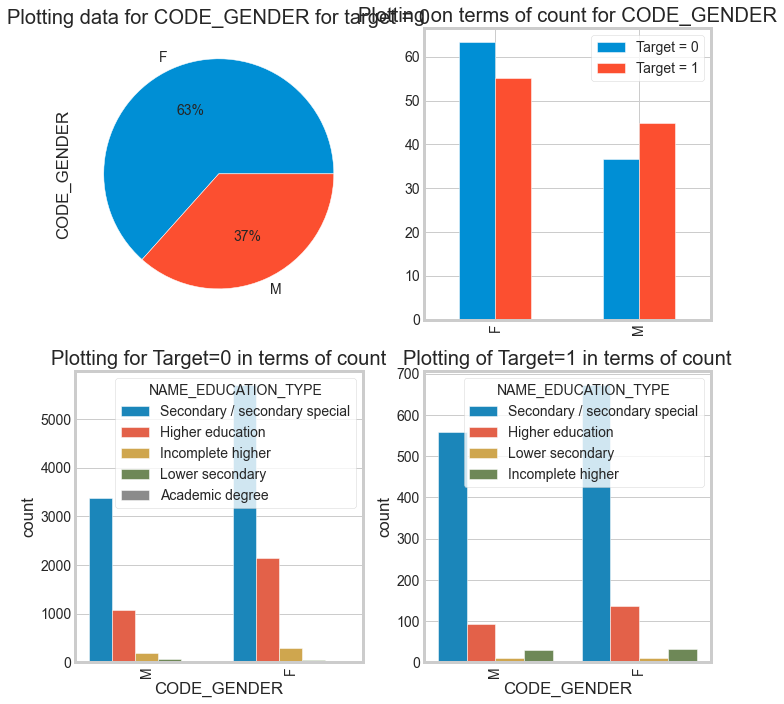

In [202]:
plotting('CODE_GENDER','NAME_EDUCATION_TYPE')

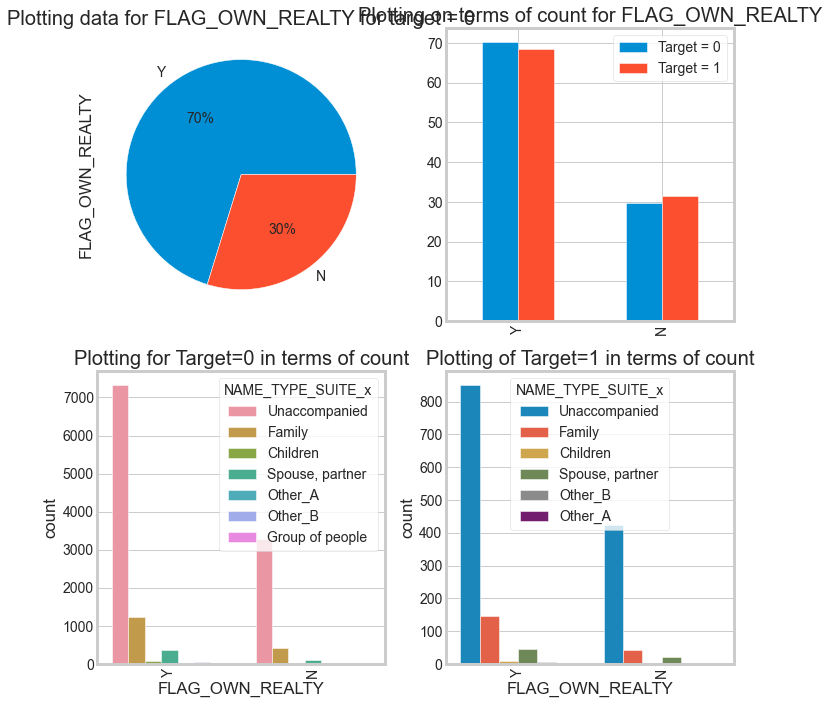

In [203]:
# Plotting name_education_type vs Code_gender
plotting('FLAG_OWN_REALTY','NAME_TYPE_SUITE_x')

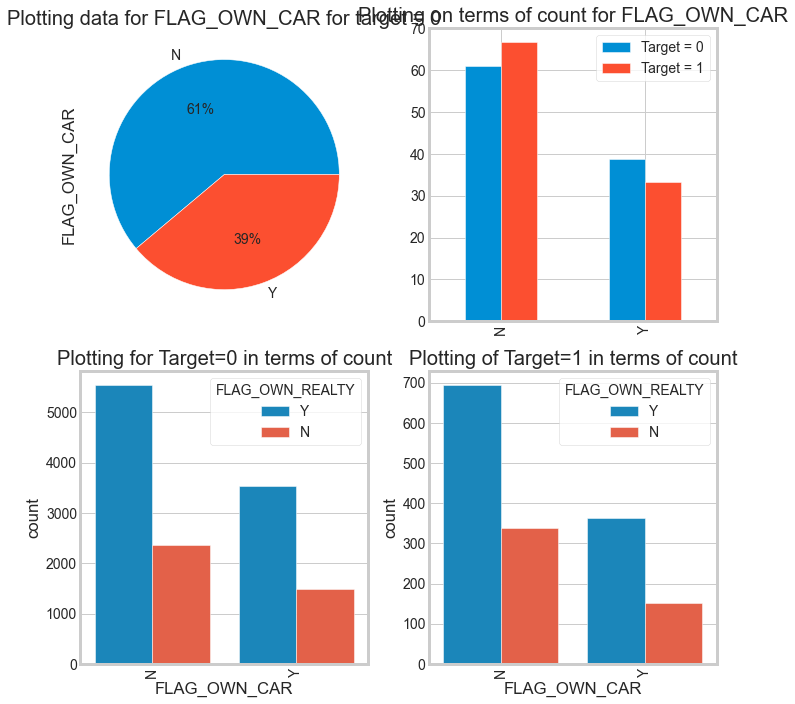

In [204]:
plotting('FLAG_OWN_CAR','FLAG_OWN_REALTY')

In [205]:
df_new.drop(['DAYS_BIRTH','DAYS_EMPLOYED','FLAG_PHONE',
       'FLAG_EMAIL','AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y'],axis=1,inplace=True)

In [206]:
df_new.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'AMT_ANNUITY_y'],axis=1,inplace=True)

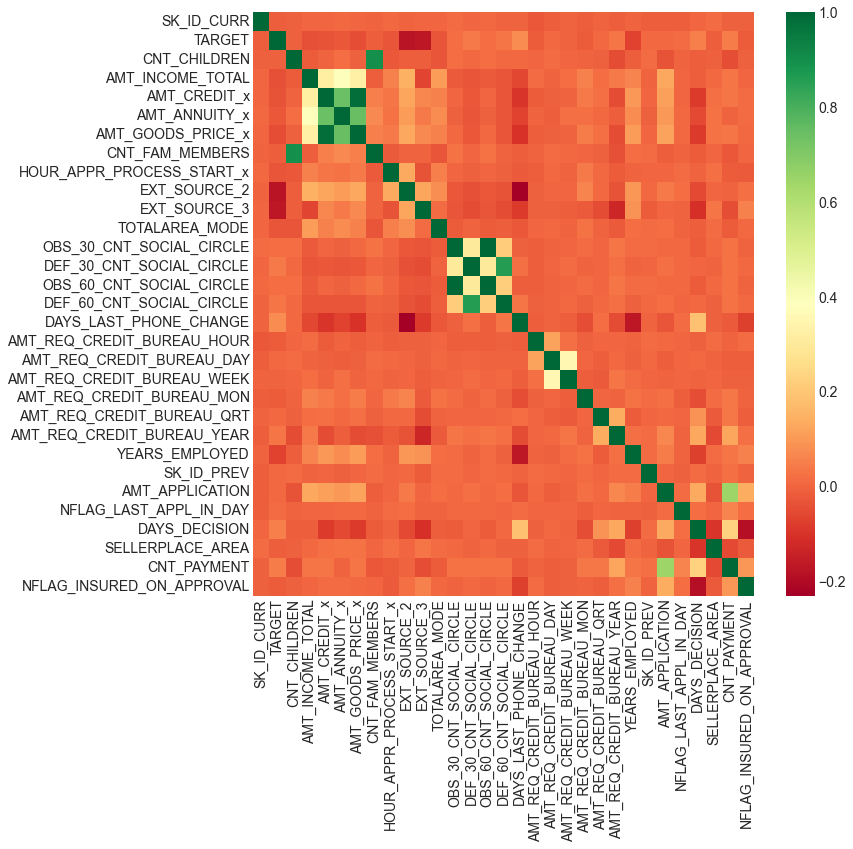

In [207]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), cmap='RdYlGn')
plt.show()

LETS DO INDIVIDUAL ANALYSIS OF TWO VARIABLES USING PIVOT TABLE and take DEFAULTING COUNT OR TARGET variable as values for comparison

In [208]:
df_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Payment_Difficulty', 'AGE',
       'YEARS_EMPLOYED', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       

In [209]:
df_new.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    10319
Higher education                  3458
Incomplete higher                  566
Lower secondary                    141
Academic degree                      4
Name: NAME_EDUCATION_TYPE, dtype: int64

In [210]:
eh=df_new.pivot_table(index='NAME_EDUCATION_TYPE', columns='NAME_HOUSING_TYPE', values='TARGET', aggfunc=np.mean)

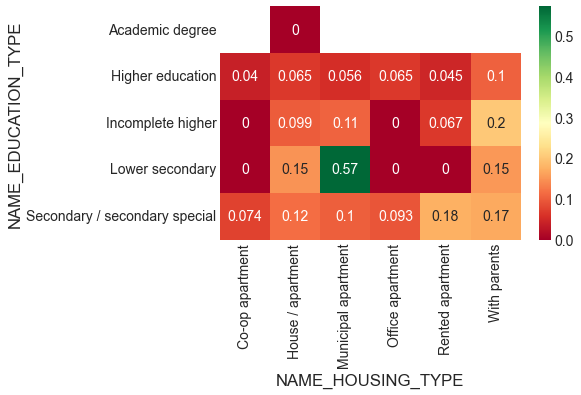

In [211]:
sns.heatmap(eh, cmap='RdYlGn', annot=True)
plt.show()

In [212]:
eh1=df_new.pivot_table(index='FLAG_OWN_REALTY', columns='CNT_FAM_MEMBERS', values='DEF_60_CNT_SOCIAL_CIRCLE')

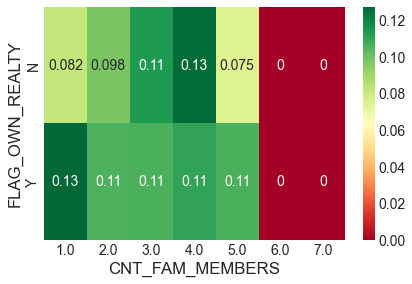

In [213]:
sns.heatmap(eh1, cmap='RdYlGn',annot=True)
plt.show()

In [214]:
eh2=df_new.pivot_table(index='CODE_GENDER', columns='OCCUPATION_TYPE', values='TARGET')

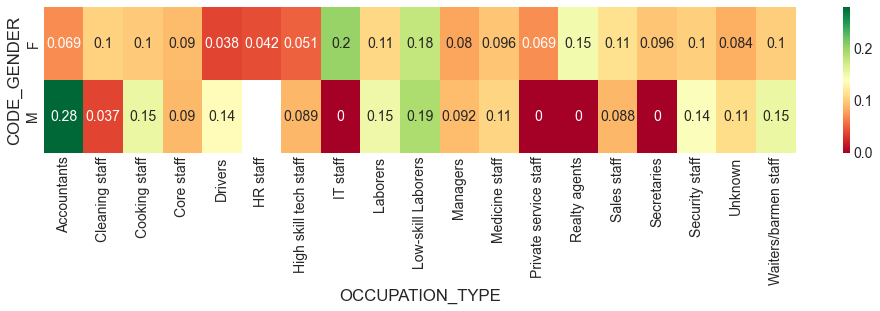

In [215]:
plt.figure(figsize=(15,2.5))
sns.heatmap(eh2, cmap='RdYlGn',annot=True)
plt.show()

Male clients working in Realty agents have more difficulties in repaying the loan.(almost around 50% chance)

In [216]:
ptrain_categorical

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE', 'Payment_Difficulty', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [217]:
eh3=df_new.pivot_table(index='INCOME_qcut', columns='ORGANIZATION_TYPE', values='TARGET')

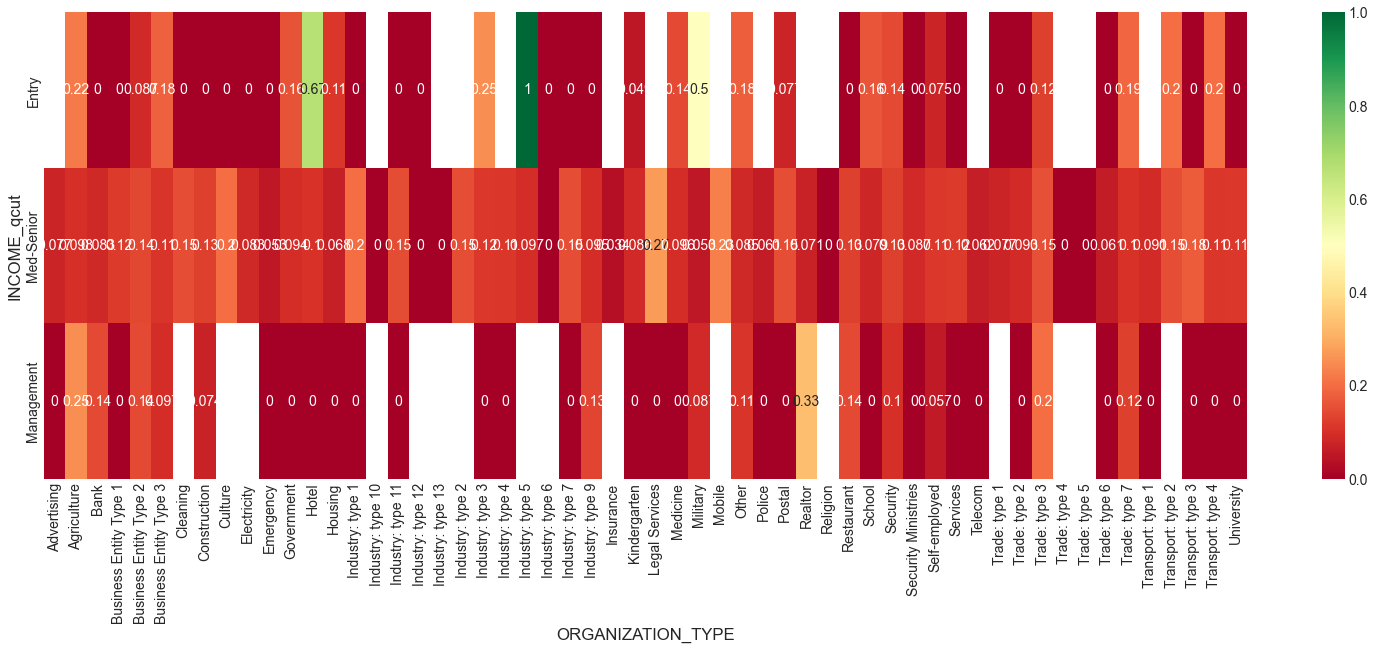

In [218]:
plt.figure(figsize=(24,8))
sns.heatmap(eh3, cmap='RdYlGn',annot=True)

plt.show()

- Management level (income higher than 350000) from Advertising, Industry-1 and Trade type-6 sector have difficulties in repaying the loan.
- Entry levels from Realtor sector have difficulty in repaying theloan

#### GOOD SECTORS -
Client from this sectors have no difficulty in repaying the loan for any income type
 - Industry-type2, Bank, Hotel, military, security ministers, Services, Government
 
 
#### BAD SECTORS -
Client from this sectors have  difficulty in repaying the loan for any income type 
 - Advertising, Industry type-1, Industry type-3, Industry type-11,Housing, Construction

In [219]:
eh6=df_new.pivot_table(index='AGE', columns='OCCUPATION_TYPE', values='DEF_30_CNT_SOCIAL_CIRCLE')

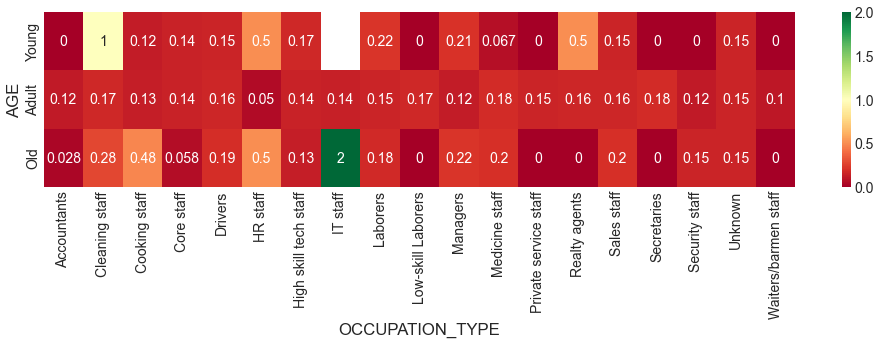

In [220]:
plt.figure(figsize=(15,3))
sns.heatmap(eh6, cmap='RdYlGn',annot=True)
plt.show()

Young clients(under age of 25 ) working in cleaning staff have more chances of defaulting the loan. So we should NO to them.

In [221]:
eh4=df_new.pivot_table(index='CODE_GENDER', columns='AGE', values='DEF_30_CNT_SOCIAL_CIRCLE')

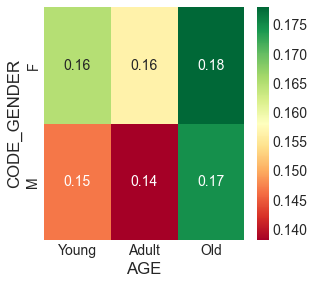

In [222]:
plt.figure(figsize=(4,4))
sns.heatmap(eh4, cmap='RdYlGn',annot=True)
plt.show()

In [223]:
eh5=df_new.pivot_table(index='CODE_GENDER', columns='NAME_EDUCATION_TYPE', values='TARGET')

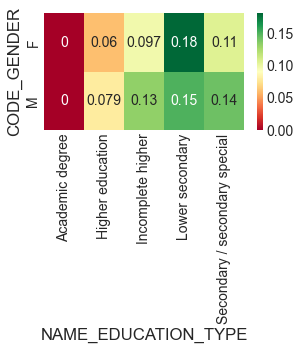

In [224]:
plt.figure(figsize=(4,2))
sns.heatmap(eh5, cmap='RdYlGn',annot=True)
plt.show()

In [225]:
df_new.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0    12754
1.0     1370
2.0      285
3.0       61
4.0       14
5.0        4
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [226]:
df_new.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0    13211
1.0     1047
2.0      196
3.0       26
4.0        6
5.0        2
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [227]:
df_new.AMT_INCOME_TOTAL.dtype

dtype('float64')

In [228]:
df_new.AMT_INCOME_TOTAL.max()

2250000.0

In [229]:
df_new.AMT_INCOME_TOTAL.min()

27000.0

In [230]:
df_new.AMT_INCOME_TOTAL.describe()

count    1.448800e+04
mean     1.784002e+05
std      9.641728e+04
min      2.700000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      2.250000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [231]:
df_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Payment_Difficulty', 'AGE',
       'YEARS_EMPLOYED', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       

#### Finding top 10 Correlation where Target variable= 0

In [232]:
train0corr = ptrain0.corr().unstack().sort_values(ascending=False).dropna()

In [233]:
train0corr[(train0corr<0.98) & (train0corr>0.5)].head(10)

AMT_CREDIT_y              AMT_APPLICATION             0.968986
AMT_APPLICATION           AMT_CREDIT_y                0.968986
AMT_GOODS_PRICE_y         AMT_CREDIT_y                0.966765
AMT_CREDIT_y              AMT_GOODS_PRICE_y           0.966765
CNT_CHILDREN              CNT_FAM_MEMBERS             0.895569
CNT_FAM_MEMBERS           CNT_CHILDREN                0.895569
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.862514
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.862514
AMT_ANNUITY_y             AMT_GOODS_PRICE_y           0.814502
AMT_GOODS_PRICE_y         AMT_ANNUITY_y               0.814502
dtype: float64

In [234]:
ptrain0[['AMT_CREDIT_y','AMT_APPLICATION','AMT_CREDIT_y'  ,'AMT_GOODS_PRICE_y','CNT_FAM_MEMBERS','CNT_CHILDREN'  ,'DEF_60_CNT_SOCIAL_CIRCLE' ,'DEF_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y']].corr()

,AMT_CREDIT_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_FAM_MEMBERS,CNT_CHILDREN,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_ANNUITY_y,AMT_GOODS_PRICE_y
AMT_CREDIT_y,1.000000,0.968986,1.000000,0.966765,-0.011283,-0.036274,0.017233,0.015552,0.813959,0.966765
AMT_APPLICATION,0.968986,1.000000,0.968986,0.986606,-0.008231,-0.032196,0.016236,0.015419,0.802701,0.986606
AMT_CREDIT_y,1.000000,0.968986,1.000000,0.966765,-0.011283,-0.036274,0.017233,0.015552,0.813959,0.966765
AMT_GOODS_PRICE_y,0.966765,0.986606,0.966765,1.000000,-0.010935,-0.035938,0.017395,0.016533,0.814502,1.000000
CNT_FAM_MEMBERS,-0.011283,-0.008231,-0.011283,-0.010935,1.000000,0.895569,-0.004826,-0.003462,-0.011668,-0.010935
CNT_CHILDREN,-0.036274,-0.032196,-0.036274,-0.035938,0.895569,1.000000,0.005497,0.002850,-0.031630,-0.035938
DEF_60_CNT_SOCIAL_CIRCLE,0.017233,0.016236,0.017233,0.017395,-0.004826,0.005497,1.000000,0.862514,0.006909,0.017395
DEF_30_CNT_SOCIAL_CIRCLE,0.015552,0.015419,0.015552,0.016533,-0.003462,0.002850,0.862514,1.000000,0.006762,0.016533
AMT_ANNUITY_y,0.813959,0.802701,0.813959,0.814502,-0.011668,-0.031630,0.006909,0.006762,1.000000,0.814502
AMT_GOODS_PRICE_y,0.966765,0.986606,0.966765,1.000000,-0.010935,-0.035938,0.017395,0.016533,0.814502,1.000000


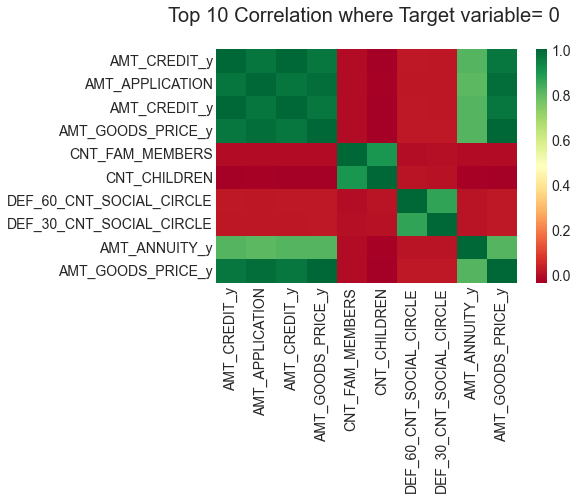

In [235]:
sns.heatmap(ptrain0[['AMT_CREDIT_y','AMT_APPLICATION','AMT_CREDIT_y'  ,'AMT_GOODS_PRICE_y','CNT_FAM_MEMBERS','CNT_CHILDREN'  ,'DEF_60_CNT_SOCIAL_CIRCLE' ,'DEF_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y']].corr(),cmap='RdYlGn')
plt.title('Top 10 Correlation where Target variable= 0 \n')
plt.show()

#### Finding top 10 Correlation where Target variable= 1

In [236]:
train1corr = ptrain1.corr().unstack().sort_values(ascending=False).dropna()

In [237]:
train1corr[(train1corr<0.98) & (train1corr>0.5)].head(10)

AMT_CREDIT_y              AMT_APPLICATION             0.971654
AMT_APPLICATION           AMT_CREDIT_y                0.971654
AMT_CREDIT_y              AMT_GOODS_PRICE_y           0.967067
AMT_GOODS_PRICE_y         AMT_CREDIT_y                0.967067
CNT_FAM_MEMBERS           CNT_CHILDREN                0.885309
CNT_CHILDREN              CNT_FAM_MEMBERS             0.885309
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.850165
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.850165
AMT_ANNUITY_y             AMT_CREDIT_y                0.845394
AMT_CREDIT_y              AMT_ANNUITY_y               0.845394
dtype: float64

In [238]:
ptrain1[['AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_ANNUITY_y','AMT_CREDIT_y','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']].corr()

,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_y,AMT_CREDIT_y,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
AMT_APPLICATION,1.000000,0.971654,0.987791,-0.063971,-0.015825,0.823126,0.971654,0.036673,0.048669
AMT_CREDIT_y,0.971654,1.000000,0.967067,-0.068336,-0.014485,0.845394,1.000000,0.033361,0.043902
AMT_GOODS_PRICE_y,0.987791,0.967067,1.000000,-0.066458,-0.014488,0.836186,0.967067,0.034740,0.043322
CNT_CHILDREN,-0.063971,-0.068336,-0.066458,1.000000,0.885309,-0.069276,-0.068336,0.023076,0.027067
CNT_FAM_MEMBERS,-0.015825,-0.014485,-0.014488,0.885309,1.000000,-0.009094,-0.014485,0.020431,0.031725
AMT_ANNUITY_y,0.823126,0.845394,0.836186,-0.069276,-0.009094,1.000000,0.845394,0.033525,0.028046
AMT_CREDIT_y,0.971654,1.000000,0.967067,-0.068336,-0.014485,0.845394,1.000000,0.033361,0.043902
DEF_60_CNT_SOCIAL_CIRCLE,0.036673,0.033361,0.034740,0.023076,0.020431,0.033525,0.033361,1.000000,0.850165
DEF_30_CNT_SOCIAL_CIRCLE,0.048669,0.043902,0.043322,0.027067,0.031725,0.028046,0.043902,0.850165,1.000000


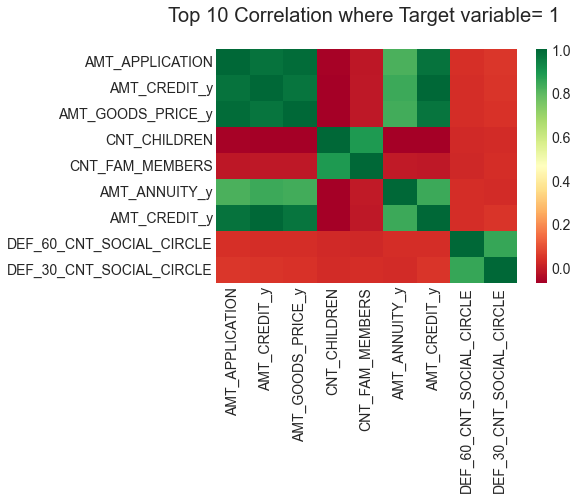

In [239]:
sns.heatmap(ptrain1[['AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_ANNUITY_y','AMT_CREDIT_y','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']].corr(), cmap='RdYlGn')
plt.title('Top 10 Correlation where Target variable= 1 \n')
plt.show()

Top 10 Correlations are similar in both cases.
This shows
- Amount of Credit applied has maximum correlation with amount of credit applied in previous application.
- Amount of Goods Price  the client asked for is also more in this case.